### Restaurants
R1 = 1 chefmozaccepts.csv

R2 = 2 chefmozcuisine.csv

R3 = 3 chefmozhours4.csv

R4 = 4 chefmozparking.csv

R5 = 5 geoplaces2.csv


### User
U6 = 6 usercuisine.csv

U7 = 7 userpayment.csv

U8 = 8 userprofile.csv


### User-Item-Rating

U9 = 9 rating_final.csv

In [1]:
#1 chefmozaccepts.csv 2 chefmozcuisine.csv 3 chefmozhours4.csv 4 chefmozparking.csv 5 geoplaces2.csv
payment_methods_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/chefmozaccepts.csv'
cuisine_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/chefmozcuisine.csv'
hours_operating_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/chefmozhours4.csv'
parking_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/chefmozparking.csv'
geo_places_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/geoplaces2.csv'
#6 usercuisine.csv 7 userpayment.csv 8 userprofile.csv
user_cuisine_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/usercuisine.csv'
user_payment_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/userpayment.csv'
user_profile_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/userprofile.csv'
#9 rating_final.csv
rating_final_url = 'https://raw.githubusercontent.com/JeanFraga/DS-Unit-1-Sprint-4-Linear-Algebra/master/Story%20Telling%20project/RCdata/rating_final.csv'
import pandas as pd

In [2]:
payment_methods = pd.read_csv(payment_methods_url, na_values= '?')
print(payment_methods.isnull().sum())
print(payment_methods.shape)
print(payment_methods.info())
payment_methods.head(10)

placeID     0
Rpayment    0
dtype: int64
(1314, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 2 columns):
placeID     1314 non-null int64
Rpayment    1314 non-null object
dtypes: int64(1), object(1)
memory usage: 20.7+ KB
None


,placeID,Rpayment
0,135110,cash
1,135110,VISA
2,135110,MasterCard-Eurocard
3,135110,American_Express
4,135110,bank_debit_cards
5,135109,cash
6,135107,cash
7,135107,VISA
8,135107,MasterCard-Eurocard
9,135107,American_Express


In [3]:
payment_methods.rename(str.lower, axis='columns', inplace=True)

In [4]:
payment_methods['rpayment'] = payment_methods['rpayment'].str.lower()

In [5]:
payment_methods.rpayment.value_counts()

cash                   500
visa                   255
mastercard-eurocard    194
american_express       153
bank_debit_cards       130
diners_club             42
discover                11
checks                  10
carte_blanche            7
gift_certificates        7
japan_credit_bureau      5
Name: rpayment, dtype: int64

In [6]:
#because no one payed with these types of payment I will go ahead and take them out of the final df
not_useful_payments = payment_methods.rpayment.value_counts()
not_useful_payments = not_useful_payments[not_useful_payments<130].index.tolist()

for i in range(len(not_useful_payments)):
    payment_methods=payment_methods[~payment_methods.rpayment.str.contains(not_useful_payments[i])]
    


In [7]:
# With this dataset I managed to reduce from 12 columns to 6 by removing unused types of payment
# Please reference to user_payment(U7) below for more information.

renamed_payments = {'rpayment_american_express': 'accepts_amex', 
                    'rpayment_bank_debit_cards': 'accepts_debit',
                   'rpayment_cash':'accepts_cash',
                   'rpayment_mastercard-eurocard': 'accepts_mastercard',
                   'rpayment_visa': 'accepts_visa'}
R1 = pd.get_dummies(payment_methods,columns=['rpayment']).groupby('placeid',as_index=False).sum()
R1.rename(columns=renamed_payments, inplace=True)
R1

,placeid,accepts_amex,accepts_debit,accepts_cash,accepts_mastercard,accepts_visa
0,132002,1,0,0,1,1
1,132012,1,1,0,0,1
2,132019,1,0,0,1,1
3,132023,1,1,0,0,0
4,132024,1,1,0,0,1
...,...,...,...,...,...,...
607,135105,0,0,1,0,0
608,135106,0,0,1,1,1
609,135107,1,1,1,1,1
610,135109,0,0,1,0,0


In [8]:
cuisine = pd.read_csv(cuisine_url, na_values= '?')
print(cuisine.isnull().sum())
print(cuisine.shape)
cuisine.head(10)

placeID     0
Rcuisine    0
dtype: int64
(916, 2)


,placeID,Rcuisine
0,135110,Spanish
1,135109,Italian
2,135107,Latin_American
3,135106,Mexican
4,135105,Fast_Food
5,135104,Mexican
6,135103,Burgers
7,135103,Dessert-Ice_Cream
8,135103,Fast_Food
9,135103,Hot_Dogs


In [9]:
cuisine.rename(str.lower, axis='columns', inplace=True)
cuisine['rcuisine'] = cuisine['rcuisine'].str.lower()
cuisine.rcuisine.value_counts()[:30]

mexican             239
international        62
american             59
dutch-belgian        55
italian              42
greek                33
bar                  32
french               31
cafe-coffee_shop     27
pizzeria             25
bar_pub_brewery      24
cafeteria            23
chinese              21
fast_food            20
seafood              18
japanese             17
family               14
german               14
mediterranean        13
burgers              13
vegetarian           10
contemporary          9
deli-sandwiches       9
steaks                8
asian                 7
latin_american        7
hot_dogs              7
sushi                 6
bakery                6
juice                 6
Name: rcuisine, dtype: int64

In [10]:
# I keep this variable so I can engineer a column with the total number of cuisines a restaurant has.
total_cuisine = (pd.get_dummies(cuisine,columns=['rcuisine']).groupby('placeid',as_index=False).sum()
                  .loc[:, 'rcuisine_afghan':].sum(axis=1))

In [11]:
# In order to reduce dimensionality I will go ahead and only keep the top 30
# then make an additional column that holds the sum of the cuisines to retain some of the use.
not_useful_cuisine = cuisine.rcuisine.value_counts()[30:].index.tolist()
#not_useful_cuisine = not_useful_cuisine[not_useful_cuisine<13].index.tolist()

for i in range(len(not_useful_cuisine)):
    cuisine=cuisine[~cuisine.rcuisine.str.contains(not_useful_cuisine[i])]
    


In [12]:
# With this dataset I managed to reduce dimensionality from 60 to 32
R2 = pd.get_dummies(cuisine,columns=['rcuisine']).groupby('placeid',as_index=False).sum()
R2['rtotal_cuisine'] = total_cuisine
R2

,placeid,rcuisine_american,rcuisine_asian,rcuisine_bakery,rcuisine_bar,rcuisine_bar_pub_brewery,rcuisine_burgers,rcuisine_cafe-coffee_shop,rcuisine_cafeteria,rcuisine_chinese,...,rcuisine_juice,rcuisine_latin_american,rcuisine_mediterranean,rcuisine_mexican,rcuisine_pizzeria,rcuisine_seafood,rcuisine_steaks,rcuisine_sushi,rcuisine_vegetarian,rtotal_cuisine
0,132001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,132002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,132003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,132004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,132005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,135104,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
734,135105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
735,135106,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
736,135107,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [13]:
# for the time being I will go ahead and forgoe the times becuase it will take me long to engineer
# R3

In [14]:
parking = pd.read_csv(parking_url, na_values= '?')
print(parking.isnull().sum())
print(parking.shape)
parking.head(10)

placeID        0
parking_lot    0
dtype: int64
(702, 2)


,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none
5,135106,none
6,135105,none
7,135104,yes
8,135103,valet parking
9,135102,valet parking


In [15]:
parking.rename(str.lower, axis='columns', inplace=True)
parking['parking'] = parking['parking_lot'].str.lower().copy()
for row in range(len(parking)):
    parking.parking[row]=parking.parking_lot[row].split(' ')[0]
parking.parking_lot.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


none                 348
yes                  174
public               102
street                32
fee                   22
valet parking         21
validated parking      3
Name: parking_lot, dtype: int64

In [16]:
# For the time being I will not reduce dimensionality for this dataset because it is straightforward
R4 = pd.get_dummies(parking,columns=['parking']).groupby(['placeid'],as_index=False).sum()
print(R4.shape)
R4.head(10)

(675, 8)


,placeid,parking_fee,parking_none,parking_public,parking_street,parking_valet,parking_validated,parking_yes
0,132012,0,0,1,1,0,0,0
1,132023,1,0,1,0,0,0,0
2,132024,0,0,0,1,0,0,0
3,132026,1,0,0,0,0,0,0
4,132030,0,0,0,1,0,0,0
5,132031,0,0,0,1,0,0,1
6,132107,0,0,1,0,0,0,0
7,132111,0,0,1,0,0,0,1
8,132155,1,0,1,0,0,0,0
9,132157,0,0,0,0,0,0,1


In [17]:
#This data set did not read for some reason. I had to make some modifications to the raw file to replace foreign characters.
geo_places = pd.read_csv(geo_places_url, na_values= '?')
print(geo_places.isnull().sum())
print(geo_places.shape)
geo_places.head(10).T

placeID             0
latitude            0
longitude           0
the_geom_meter      0
name                0
address            27
city               18
state              18
country            28
fax               130
zip                74
alcohol             0
smoking_area        0
dress_code          0
accessibility       0
price               0
url               116
Rambience           0
franchise           0
area                0
other_services      0
dtype: int64
(130, 21)


,0,1,2,3,4,5,6,7,8,9
placeID,134999,132825,135106,132667,132613,135040,132732,132875,132609,135082
latitude,18.9154,22.1474,22.1497,23.7527,23.7529,22.1356,23.7544,22.1499,23.7603,22.1514
longitude,-99.1849,-100.983,-100.976,-99.1634,-99.1651,-100.97,-99.1713,-100.994,-99.1659,-100.915
the_geom_meter,0101000020957F000088568DE356715AC138C0A525FC46...,0101000020957F00001AD016568C4858C1243261274BA5...,0101000020957F0000649D6F21634858C119AE9BF528A3...,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,0101000020957F00001B552189B84A58C15A2AAEFD2CA2...,0101000020957F00008A20E615808157C16272FECBF84F...,0101000020957F00008A2A0747DE4758C11EB31D2A31A8...,0101000020957F0000A478418BBA8057C133851EB22C4E...,0101000020957F0000A29FAF95CD4958C1FEEEBB73A991...
name,Kiku Cuernavaca,puesto de tacos,El Rincon de San Francisco,little pizza Emilio Portes Gil,carnitas_mata,Restaurant los Compadres,Taqueria EL amigo,shi ro ie,Pollo_Frito_Buenos_Aires,la Estrella de Dimas
address,Revolucion,esquina santos degollado y leon guzman,Universidad 169,calle emilio portes gil,lic. Emilio portes gil,Camino a Simon Diaz 155 Centro,Calle Mezquite Fracc Framboyanes,NaN,tampico,Villa de Pozos 192 Villa de Pozos
city,Cuernavaca,s.l.p.,San Luis Potosi,victoria,victoria,San Luis Potosi,Cd Victoria,NaN,victoria,San Luis Potosi
state,Morelos,s.l.p.,San Luis Potosi,tamaulipas,Tamaulipas,SLP,Tamaulipas,NaN,Tamaulipas,SLP
country,Mexico,mexico,Mexico,NaN,Mexico,Mexico,Mexico,NaN,Mexico,Mexico
fax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
geo_places.rename(str.lower, axis='columns', inplace=True)

# I will cut geo_places because it is a unique value throughout.
print(geo_places['the_geom_meter'].value_counts(), '\n')

#We can see that name are pretty much unique all throughout. At this moment I will not try to make anything out of this column.
print(geo_places['name'].value_counts(), '\n')

#We can see that a few restaurants are near each other when they have the same address.
#because of possible typos that we have seen on other columns I decided Longitude and Latitude is a better measure for distance.
print(geo_places['address'].value_counts(),'\n')

#We can see that city might be a useful feature to clean up. I will start by removing dots, making it all lower caps.
before_changes = geo_places['city'].value_counts()
print(before_changes, '\n')
geo_places['city'] = geo_places['city'].str.replace('.','')
geo_places['city'] = geo_places['city'].str.replace(' ','')
geo_places['city'] = geo_places['city'].str.lower()
geo_places['city'] = geo_places['city'].str.replace('cdvictoria','victoria')
geo_places['city'] = geo_places['city'].str.replace('ciudadvictoria','victoria')
geo_places['city'] = geo_places['city'].str.replace('sanluispotosi','sanluispotos')
geo_places['city'] = geo_places['city'].str.replace('slp','sanluispotos')
geo_places['city'] = geo_places['city'].fillna('sanluispotos')
#after cleaning up this column
print(geo_places['city'].value_counts(),'\n')

# This looks like a column that will need cleaning up as well but similar to city.
print(geo_places['state'].value_counts(),'\n')
geo_places['state'] = geo_places['state'].str.replace('.','')
geo_places['state'] = geo_places['state'].str.replace(' ','')
geo_places['state'] = geo_places['state'].str.lower()
geo_places['state'] = geo_places['state'].str.replace('slp','sanluispotosi')
geo_places['state'] = geo_places['state'].str.replace('sanluispotosi','sanluispotos')
geo_places['state'] = geo_places['state'].fillna('sanluispotos')
# There is a state called Mexico in Mexico. I have to make sure that this value is correct later.
print(geo_places['state'].value_counts(),'\n')

#we can see that this is inteded as a boolean
print(geo_places['franchise'].value_counts(), '\n')
geo_places['franchise'] = geo_places['franchise'].str.replace('f','0')
geo_places['franchise'] = geo_places['franchise'].str.replace('t','1')
geo_places['franchise'] = geo_places['franchise'].astype('int64').astype('bool')
print(geo_places['franchise'].value_counts(), '\n')

# This column has 3 unique values and does not need work.
print(geo_places['other_services'].value_counts(), '\n')

# This column I create from URL to evaluate if the restaurant has a url or not
geo_places['has_url'] = geo_places['url'].copy()
geo_places['has_url'].loc[~geo_places['has_url'].isnull()] = 1  # not nan
geo_places['has_url'].loc[geo_places['has_url'].isnull()] = 0   # nan
geo_places['has_url'] = geo_places['has_url'].astype('int64').astype('bool')

# In order to create some logical order to the column 'price' I will go ahead and encode it now.
# 'low': 0, 'medium':1, 'high':2
geo_places['price'].replace('low', 0, inplace=True)
geo_places['price'].replace('medium', 1, inplace=True)
geo_places['price'].replace('high', 2, inplace=True)

0101000020957F0000B230F8670C4E58C1D590A2700F8F4B41    1
0101000020957F0000EB71019D424558C15CC5404365A94B41    1
0101000020957F0000B1F935F9FA775AC1D06DFD1017514A41    1
0101000020957F000088568DE356715AC138C0A525FC464A41    1
0101000020957F00004C95C918394758C17A5C44896AA34B41    1
                                                     ..
0101000020957F00006376BB64EF4758C1013687E5D7A64B41    1
0101000020957F0000C57C76034C4858C10E437A7E15A74B41    1
0101000020957F0000D010A853D34858C116A1EA51CAA24B41    1
0101000020957F0000ED435B84934958C1B3CF85FA97914B41    1
0101000020957F00001672C2C435775AC1F69BF2EF0D424A41    1
Name: the_geom_meter, Length: 130, dtype: int64 

Gorditas Dona Tota              2
El Rincon de San Francisco      2
Luna Cafe                       1
KFC                             1
cafe ambar                      1
                               ..
Restaurante Versalles           1
Restaurante Bar El Gallinero    1
Pizzeria Julios                 1
Paniroles                   

In [19]:
#I'm considering using URL as a way to predict if it has a url or not.
#Restaurants without a URL might just not have a website.
#from looking at the documentation for the dataset I can see that there are no other columns to clean up.
R5 = geo_places.drop(columns = ['fax', 'zip','url','country', 'name','the_geom_meter','address'])
print(R5.shape)
R5.head(30)

(130, 15)


,placeid,latitude,longitude,city,state,alcohol,smoking_area,dress_code,accessibility,price,rambience,franchise,area,other_services,has_url
0,134999,18.915421,-99.184871,cuernavaca,morelos,No_Alcohol_Served,none,informal,no_accessibility,1,familiar,False,closed,none,True
1,132825,22.147392,-100.983092,sanluispotos,sanluispotos,No_Alcohol_Served,none,informal,completely,0,familiar,False,open,none,False
2,135106,22.149709,-100.976093,sanluispotos,sanluispotos,Wine-Beer,only at bar,informal,partially,1,familiar,False,open,none,False
3,132667,23.752697,-99.163359,victoria,tamaulipas,No_Alcohol_Served,none,informal,completely,0,familiar,True,closed,none,False
4,132613,23.752903,-99.165076,victoria,tamaulipas,No_Alcohol_Served,permitted,informal,completely,1,familiar,True,closed,none,False
5,135040,22.135617,-100.969709,sanluispotos,sanluispotos,Wine-Beer,none,informal,no_accessibility,2,familiar,False,closed,none,False
6,132732,23.754357,-99.171288,victoria,tamaulipas,No_Alcohol_Served,none,casual,completely,0,familiar,False,open,none,False
7,132875,22.149901,-100.993779,sanluispotos,sanluispotos,Wine-Beer,section,informal,no_accessibility,2,familiar,True,open,Internet,False
8,132609,23.760268,-99.165865,victoria,tamaulipas,No_Alcohol_Served,not permitted,informal,completely,0,quiet,True,closed,none,False
9,135082,22.151448,-100.915099,sanluispotos,sanluispotos,No_Alcohol_Served,none,informal,no_accessibility,1,familiar,False,closed,none,False


In [20]:
user_cuisine = pd.read_csv(user_cuisine_url,na_values= '?')
print(user_cuisine.isnull().sum())
print(user_cuisine.shape)
user_cuisine.head(10)

userID      0
Rcuisine    0
dtype: int64
(330, 2)


,userID,Rcuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican
3,U1004,Bakery
4,U1004,Breakfast-Brunch
5,U1004,Japanese
6,U1004,Contemporary
7,U1004,Mexican
8,U1004,Bagels
9,U1004,Cafe-Coffee_Shop


In [21]:
# At this moment I will not reduce dimensionality for this dataset because I may be able to extract some use for it
user_cuisine.rename(str.lower, axis='columns', inplace=True)
user_cuisine.rename(columns={'rcuisine':'ucuisine'}, inplace=True)
user_cuisine['ucuisine'] = user_cuisine['ucuisine'].str.lower().copy()
user_cuisine['userid'] = user_cuisine['userid'].str.lower()
user_cuisine.ucuisine.value_counts()[:30]

mexican             97
american            11
pizzeria             9
cafeteria            9
cafe-coffee_shop     8
family               8
italian              7
japanese             7
burgers              6
chinese              6
hot_dogs             6
latin_american       6
contemporary         5
regional             5
fast_food            5
afghan               4
bakery               3
tex-mex              3
barbecue             3
moroccan             3
juice                3
bar                  3
breakfast-brunch     3
deli-sandwiches      3
game                 3
diner                3
sushi                3
bagels               2
lebanese             2
portuguese           2
Name: ucuisine, dtype: int64

In [22]:
# I keep this column so I can engineer a new column with the total number of cuisines the users selected
total_cuisine = (pd.get_dummies(user_cuisine,columns=['ucuisine']).groupby('userid',as_index=False).sum()
                  .loc[:, 'ucuisine_afghan':].sum(axis=1))

In [23]:
# In order to reduce dimensionality I will go ahead and only keep the top 30
# then make an additional column that holds the sum of the ucuisines to retain some of the use.
not_useful_cuisine = user_cuisine.ucuisine.value_counts()[30:].index.tolist()

for i in range(len(not_useful_cuisine)):
    user_cuisine=user_cuisine[~user_cuisine.ucuisine.str.contains(not_useful_cuisine[i])]
    


In [24]:
# With this dataset I managed to reduce dimensionality from 105 to 32
U6 = pd.get_dummies(user_cuisine,columns=['ucuisine']).groupby(['userid'],as_index=False).sum()
U6['utotal_cuisine'] = total_cuisine
print(U6.shape)
U6.head(10)

(136, 32)


,userid,ucuisine_afghan,ucuisine_american,ucuisine_bagels,ucuisine_bakery,ucuisine_bar,ucuisine_barbecue,ucuisine_breakfast-brunch,ucuisine_burgers,ucuisine_cafe-coffee_shop,...,ucuisine_latin_american,ucuisine_lebanese,ucuisine_mexican,ucuisine_moroccan,ucuisine_pizzeria,ucuisine_portuguese,ucuisine_regional,ucuisine_sushi,ucuisine_tex-mex,utotal_cuisine
0,u1001,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,u1002,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,u1003,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,u1004,0,0,1,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,9
4,u1005,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,u1006,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6,u1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,u1008,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,10
8,u1009,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,7
9,u1010,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
user_payment = pd.read_csv(user_payment_url,na_values= '?')
print(user_payment.isnull().sum())
print(user_payment.shape)
user_payment.head(10)

userID      0
Upayment    0
dtype: int64
(177, 2)


,userID,Upayment
0,U1001,cash
1,U1002,cash
2,U1003,cash
3,U1004,cash
4,U1004,bank_debit_cards
5,U1005,cash
6,U1006,cash
7,U1007,cash
8,U1008,cash
9,U1009,cash


In [26]:
user_payment.rename(str.lower, axis='columns', inplace=True)
user_payment['upayment'] = user_payment['upayment'].str.lower()
user_payment['userid'] = user_payment['userid'].str.lower()

### With this I have made sure to see what type of payments I should include in my final predictions.

I noticed that several types of payment specified by the restaurant where not used by the clients and I assume will not affect the target in any way.

In [27]:
payment = payment_methods.rpayment.value_counts().index.tolist()
for i in range(len(payment)):
    if len(user_payment.upayment[user_payment.upayment == payment[i]].value_counts()) == 1:
        print(user_payment.upayment[user_payment.upayment == payment[i]].value_counts(), '\n')
    else:
        print(f'{payment[i]} has no values \n')

cash    131
Name: upayment, dtype: int64 

visa    17
Name: upayment, dtype: int64 

mastercard-eurocard    4
Name: upayment, dtype: int64 

american_express    3
Name: upayment, dtype: int64 

bank_debit_cards    22
Name: upayment, dtype: int64 



In [28]:
# Here I create a dictionary to make reading these features easier and also take less space
renamed_payments = {'upayment_american_express': 'upays_amex', 
                    'upayment_bank_debit_cards': 'upays_debit',
                   'upayment_cash':'upays_cash',
                   'upayment_mastercard-eurocard': 'upays_mastercard',
                   'upayment_visa': 'upays_visa'}


U7 = pd.get_dummies(user_payment,columns=['upayment']).groupby(['userid'],as_index=False).sum()
U7.rename(columns=renamed_payments, inplace=True)
print(U7.shape)
U7.head(10)

(133, 6)


,userid,upays_amex,upays_debit,upays_cash,upays_mastercard,upays_visa
0,u1001,0,0,1,0,0
1,u1002,0,0,1,0,0
2,u1003,0,0,1,0,0
3,u1004,0,1,1,0,0
4,u1005,0,0,1,0,0
5,u1006,0,0,1,0,0
6,u1007,0,0,1,0,0
7,u1008,0,0,1,0,0
8,u1009,0,0,1,0,0
9,u1010,0,0,1,0,0


In [29]:
# This dataset looks for the most part clean. I assume that users did not want to specify certain things about their life.
# Which is why we might see NaNs in a couple of the columns. So I will opt to replace them with 'unkown' to look for any trends.
user_profile = pd.read_csv(user_profile_url,na_values= '?')
print(user_profile.isnull().sum())
print(user_profile.shape)
user_profile.head(10)

userID               0
latitude             0
longitude            0
smoker               3
drink_level          0
dress_preference     5
ambience             6
transport            7
marital_status       4
hijos               11
birth_year           0
interest             0
personality          0
religion             0
activity             7
color                0
weight               0
budget               7
height               0
dtype: int64
(138, 19)


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,False,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,False,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,False,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,False,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69
5,U1006,22.150000,-100.983000,True,social drinker,no preference,friends,car owner,single,independent,1989,variety,hard-worker,none,student,blue,75,medium,1.80
6,U1007,22.118464,-100.938256,False,casual drinker,informal,solitary,public,single,independent,1989,variety,thrifty-protector,Catholic,student,purple,60,low,1.59
7,U1008,22.122989,-100.923811,False,social drinker,formal,solitary,public,single,independent,1989,technology,hard-worker,Catholic,student,green,68,low,1.72
8,U1009,22.159427,-100.990448,False,abstemious,formal,family,on foot,single,kids,1991,variety,thrifty-protector,Catholic,student,green,75,medium,1.78
9,U1010,22.190889,-100.998669,False,social drinker,no preference,friends,car owner,married,kids,1987,technology,hard-worker,none,student,green,40,medium,1.67


In [30]:
user_profile.dtypes

userID               object
latitude            float64
longitude           float64
smoker               object
drink_level          object
dress_preference     object
ambience             object
transport            object
marital_status       object
hijos                object
birth_year            int64
interest             object
personality          object
religion             object
activity             object
color                object
weight                int64
budget               object
height              float64
dtype: object

In [31]:
user_profile.rename(str.lower, axis='columns', inplace=True)
user_profile['userid'] = user_profile['userid'].str.lower()

# I will make smoker a bool to make sure it is not treated as an object
user_profile.smoker = user_profile.smoker.astype('bool')

U8 = user_profile.copy()
for column in U8.columns:
    #print(column)
    U8[column] = U8[column].fillna('unknown')

# I make add "u" to longitude and latitude to differentiate it from the restaurants.
U8.rename(columns={"latitude": "ulatitude", "longitude": "ulongitude"}, inplace=True)

# In order to create some logical order to the column 'budget' I will go ahead and encode it now.
# 'unknown': -1, 'low': 0, 'medium':1, 'high':2
U8['budget'].replace('unknown', -1, inplace=True)
U8['budget'].replace('low', 0, inplace=True)
U8['budget'].replace('medium', 1, inplace=True)
U8['budget'].replace('high', 2, inplace=True)

U8.head()

,userid,ulatitude,ulongitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,u1001,22.139997,-100.978803,False,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,1,1.77
1,u1002,22.150087,-100.983325,False,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,0,1.87
2,u1003,22.119847,-100.946527,False,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,0,1.69
3,u1004,18.867000,-99.183000,False,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,1,1.53
4,u1005,22.183477,-100.959891,False,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,1,1.69


In [32]:
rating_final = pd.read_csv(rating_final_url, na_values= '?')
rating_final.rename(str.lower, axis='columns', inplace=True)
rating_final['userid'] = rating_final['userid'].str.lower()
U9 = rating_final.copy()
print(rating_final.isnull().sum())
print(rating_final.shape)
rating_final

userid            0
placeid           0
rating            0
food_rating       0
service_rating    0
dtype: int64
(1161, 5)


,userid,placeid,rating,food_rating,service_rating
0,u1077,135085,2,2,2
1,u1077,135038,2,2,1
2,u1077,132825,2,2,2
3,u1077,135060,1,2,2
4,u1068,135104,1,1,2
...,...,...,...,...,...
1156,u1043,132630,1,1,1
1157,u1011,132715,1,1,0
1158,u1068,132733,1,1,0
1159,u1068,132594,1,1,1


In [33]:
# after merging I can succesfully say I have engineered 116 features down from 602
final = (pd.merge(U9, U8, how='left', on=['userid'])
        .merge(U7, how='left', on=['userid'])
        .merge(U6, how='left', on=['userid'])
        .merge(R5, how='left', on=['placeid'])
        .merge(R4, how='left', on=['placeid'])
        .merge(R2, how='left', on=['placeid'])
        .merge(R1, how='left', on=['placeid']))
print(final.shape)

#I concluded that I can fill 'NaN' values with '0' because it will not affect my final results.
for column in final.columns:
    final[column] = final[column].fillna(0)
print(final.isnull().sum())

final.head()

(1161, 116)
userid                0
placeid               0
rating                0
food_rating           0
service_rating        0
                     ..
accepts_amex          0
accepts_debit         0
accepts_cash          0
accepts_mastercard    0
accepts_visa          0
Length: 116, dtype: int64


,userid,placeid,rating,food_rating,service_rating,ulatitude,ulongitude,smoker,drink_level,dress_preference,...,rcuisine_seafood,rcuisine_steaks,rcuisine_sushi,rcuisine_vegetarian,rtotal_cuisine,accepts_amex,accepts_debit,accepts_cash,accepts_mastercard,accepts_visa
0,u1077,135085,2,2,2,22.156469,-100.985540,False,social drinker,elegant,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
1,u1077,135038,2,2,1,22.156469,-100.985540,False,social drinker,elegant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,u1077,132825,2,2,2,22.156469,-100.985540,False,social drinker,elegant,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,u1077,135060,1,2,2,22.156469,-100.985540,False,social drinker,elegant,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,u1068,135104,1,1,2,23.752269,-99.168605,False,casual drinker,informal,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


### from testing the null values with these lines on merge I concluded that I can fill in 'NaN' with 0 and it will not affect my final result

pd.merge(U9, U8, how='left', on=['userid']).merge(U7, how='left', on=['userid']).isnull().sum()

pd.merge(U9, U8, how='left', on=['userid']).merge(U6, how='left', on=['userid']).isnull().sum()

pd.merge(U9, U8, how='left', on=['userid']).merge(R5, how='left', on=['placeid']).isnull().sum()

pd.merge(U9, U8, how='left', on=['userid']).merge(R4, how='left', on=['placeid']).isnull().sum()

pd.merge(U9, U8, how='left', on=['userid']).merge(R2, how='left', on=['placeid']).isnull().sum()

pd.merge(U9, U8, how='left', on=['userid']).merge(R1, how='left', on=['placeid']).isnull().sum()

In [34]:
# with this save file I am able to update the file if I need to make changes to the features for the models I will run.
final.to_csv('Restaurant_Consumer_Data_merged',index=False)

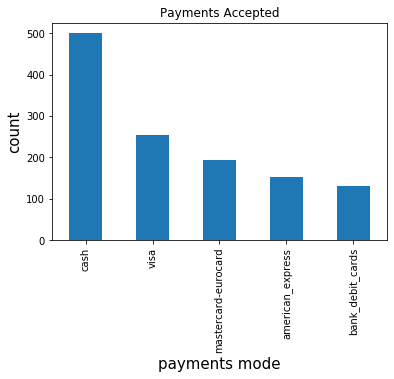

In [37]:
rpayment_plot=payment_methods.rpayment.value_counts().plot.bar(title="Payments Accepted")
rpayment_plot.set_xlabel('payments mode',size=15)
rpayment_plot.set_ylabel('count',size=15);

Text(0, 0.5, 'count')

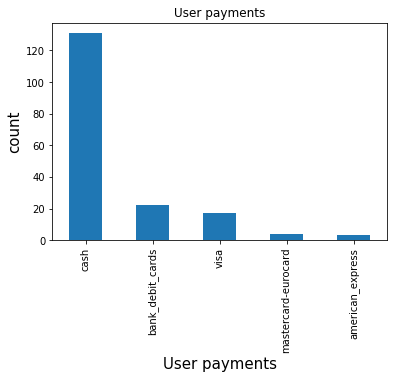

In [39]:
upayment_plot=user_payment.upayment.value_counts().plot.bar(title="User payments")
upayment_plot.set_xlabel('User payments',size=15)
upayment_plot.set_ylabel('count',size=15)